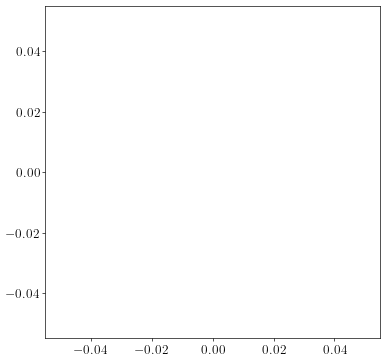

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
from utils import LeisureCB, WageChangeCB, LeisureExp, WageChangeExp, LeisureSate, WageChangeSate, Welfare
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk09_practice.json"
IMAGE_PATH = "../assets/images/wk09"
probs = []
nprob = 0

In [2]:
# Cobb Douglas Labor Leisure
df = pd.read_csv("LeisureCB_examples.csv")
mydf = df.sample(30)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = LeisureCB(params)
    c = prob.sol['c']
    l = prob.sol['l']
    h = prob.sol['h']
    setup = prob.setup()
    setup += fr"""
<p>Calculate the optimal choice of weekly consumption, leisure hours, and working hours.</p>
"""
    solution = fr"""
<p>Weekly consumption = \({c:g}\) </p>
<p>Leisure hours = \({l:g}\)</p>
<p>Working hours = \({h:g}\)</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

30


In [3]:
# Cobb Douglas Labor Leisure (Graphical)
df = pd.read_csv("LeisureCB_examples.csv")
mydf = df.sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = LeisureCB(params)
    nx, dx, ny, dy, w, cmax = params['nx'], params['dx'], params['ny'], params['dy'], params['w'], params['cmax']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>Draw the budget constraint. Label the optimal choice of consumption and leisure.</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

50


In [4]:
# Cobb Douglas Labor Leisure Wage Change
df = pd.read_csv("WageChangeCB_examples.csv")
mydf = df.sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = WageChangeCB(params)
    nx, dx, ny, dy, w1, w2, cmax = params['nx'], params['dx'], params['ny'], params['dy'], params['w1'], params['w2'], params['cmax']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(period1=False, period2=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(period1=True, period2=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w1:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>1. Draw the budget constraint. Label the optimal choice of consumption and leisure A.</p>
<p>2. Suppose the wage rate changes to \(w={w2:g}\). Draw the new budget constraint and label the new optimal choice B.</p>
<p>3. Does the change in wages increase or decrease the number of hours worked?</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">

<p>The change in wage rate did not affect the number of hours worked.</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

70


In [5]:
# Exponent Labor Leisure (Graphical)
df = pd.read_csv("LeisureExp_examples.csv")
mydf = df.sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = LeisureExp(params)
    a, kn, kd, w, cmax = params['a'], params['kn'], params['kd'], params['w'], params['cmax']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>Draw the budget constraint. Label the optimal choice of consumption and leisure.</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

90


In [6]:
# Exponential Labor Leisure Wage Change
df = pd.read_csv("WageChangeExp_examples.csv")
mydf = df.sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = WageChangeExp(params)
    w1 = params['w1']
    w2 = params['w2']
    h1 = prob.prob1.sol['h']
    h2 = prob.prob2.sol['h']
    if h1>h2:
        incdec = "The change in wage rate increased the number of hours worked."
    elif h1<h2:
        incdec = "The change in wage rate decreased the number of hours worked."
    else:
        incdec = "The change in wage rate did not affect the number of hours worked."
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(period1=False, period2=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(period1=True, period2=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w1:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>1. Draw the budget constraint. Label the optimal choice of consumption and leisure A.</p>
<p>2. Suppose the wage rate changes to \(w={w2:g}\). Draw the new budget constraint and label the new optimal choice B.</p>
<p>3. Does the change in wages increase or decrease the number of hours worked?</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">

<p>{incdec}</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

110


In [7]:
# Satiated Labor Leisure (Graphical)
df = pd.read_csv("LeisureSate_examples.csv")
mydf = df.sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = LeisureSate(params)
    w = params['w']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>Draw the budget constraint. Label the optimal choice of consumption and leisure.</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

130


In [8]:
# Satiated Labor Leisure Wage Change
df = pd.read_csv("WageChangeSate_examples.csv")
mydf = df.loc[
    (df['l2']-df['l1'])/(df['w2']-df['w1']) > 0
].sample(20)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = WageChangeSate(params)
    w1 = params['w1']
    w2 = params['w2']
    h1 = prob.prob1.sol['h']
    h2 = prob.prob2.sol['h']
    if h1>h2:
        incdec = "The change in wage rate increased the number of hours worked."
    elif h1<h2:
        incdec = "The change in wage rate decreased the number of hours worked."
    else:
        incdec = "The change in wage rate did not affect the number of hours worked."
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(period1=False, period2=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(period1=True, period2=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w1:g}\). The person has utility over
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>1. Draw the budget constraint. Label the optimal choice of consumption and leisure A.</p>
<p>2. Suppose the wage rate changes to \(w={w2:g}\). Draw the new budget constraint and label the new optimal choice B.</p>
<p>3. Does the change in wages increase or decrease the number of hours worked?</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">

<p>{incdec}</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

150


In [9]:
# Welfare
df = pd.read_csv("Welfare_examples.csv")
mydf = pd.concat([
    df.loc[ df['h']>0 ].sample(20),                                       # still work after welfare
    df.loc[ (df['h']==0) & (df['c'] < df['c_no_welfare']) ].sample(20),   # welfare reduces both work and consumption
    df.loc[ (df['h']==0) & (df['c'] > df['c_no_welfare']) ].sample(20),   # welfare reduces work but increases consumption
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = Welfare(params)
    w = params['w']
    minc = params['minc']
    h = prob.sol['h']
    c = prob.sol['c']
    c_no_welfare = prob.sol['c_no_welfare']
    if h>0:
        incdec = "Social welfare system did not change hours worked or consumption."
    elif (c < c_no_welfare):
        incdec = "Social welfare system reduced both consumption and number of hours worked."
    else:
        incdec = "Social welfare system increased consumption but reduced number of hours worked."
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>An individual can work for up to 60 hours a week at an hourly rate of \(w={w:g}\). The person has utility over 
weekly consumption \(c\) and weekly leisure hours \(\ell\) given by the following indifference curves:</p>

<img src="/CSUN-Econ-310/assets/images/wk09/{setup_filename}">

<p>A welfare system exists to guarantee an income of at least \({minc:g}\), regardless of number of hours worked.</p>

<p>1. Draw the budget constraint with the welfare system. Label the optimal choice of consumption and leisure.</p>
<p>2. Does the welfare system increase or decrease consumption? Does it increase or decrease the number of hours worked?</p>
"""
    solution = fr"""
<img src="/CSUN-Econ-310/assets/images/wk09/{solution_filename}">

<p>{incdec}</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

210


In [10]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [11]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [12]:
prob = np.random.choice(myprobs)
display(Latex(prob['setup']))
display(Latex(prob['solution']))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>